In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Definition of acquisition:
* customers have past trial
* Did not request refund
* Revenue > 0

Assumptions:
* Acquisition channel of subscriber base is representative of all customers
* 21% of people who make it past trial request a refund for subscriber base. Assume this holds true for all customers.

In [2]:
df_sub = pd.read_pickle('/Users/reesezhuang/Desktop/NYU Stern/Final individual/subscribers')
#change the .xlsx file to .csv file before importing
df_spend = pd.read_csv('/Users/reesezhuang/Desktop/NYU Stern/Final individual/advertising_spend_data.csv', skiprows=2)
df_cus = pd.read_pickle('/Users/reesezhuang/Desktop/NYU Stern/Final individual/customer_service_reps')

In [3]:
df_sub['month'] = df_sub['account_creation_date'].dt.to_period('M')

In [4]:
df_spend['month'] = pd.to_datetime(df_spend['date'], infer_datetime_format=True).dt.to_period('M')
df_spend = df_spend.drop('date', axis = 1)

In [5]:
df_cus['month'] = df_cus['account_creation_date'].dt.to_period('M')

In [6]:
df_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,month
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01


In [7]:
df_spend

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral,month
0,84800,75000,17300,21400,11900,10500,5900,6100,2019-06
1,60000,75600,17300,21300,12000,29800,6000,6600,2019-07
2,52300,76100,18100,21300,16300,65900,6200,6800,2019-08
3,49000,75800,18900,21300,16400,73700,6000,7400,2019-09
4,51300,76000,21000,21400,12200,32300,6700,7300,2019-10
5,56100,75900,21400,21600,11700,9800,6300,7300,2019-11
6,51400,76100,32100,22200,12100,3500,7200,8000,2019-12
7,49000,75500,33600,22700,14300,300,6700,7400,2020-01
8,49700,76600,30100,21700,15000,300,6400,6500,2020-02
9,49100,78000,22700,21200,17600,300,5900,10000,2020-03


In [8]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   facebook                 10 non-null     int64    
 1   email                    10 non-null     int64    
 2   search                   10 non-null     int64    
 3   brand sem intent google  10 non-null     int64    
 4   affiliate                10 non-null     int64    
 5   email_blast              10 non-null     int64    
 6   pinterest                10 non-null     int64    
 7   referral                 10 non-null     int64    
 8   month                    10 non-null     period[M]
dtypes: int64(8), period[M](1)
memory usage: 848.0 bytes


In [9]:
# conversion defined as customer who had past trial, didn't cancel after trial, and had revenue > 0
df_sub['conversion'] = np.where((df_sub['cancel_before_trial_end'] == False) |
                                (df_sub['revenue_net'] <= 0) |
                                (df_sub['refund_after_trial_TF'] == True),
                                    False, True)

In [10]:
df_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,month,conversion
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,2020-01,True
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,2020-03,False
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,2019-12,False
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,2020-01,False
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,2019-10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,2019-11,False
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,2019-12,True
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,2019-12,False
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,2020-01,True


In [11]:
df_sub.groupby(['cancel_before_trial_end','conversion']).subid.count()

cancel_before_trial_end  conversion
False                    False         124071
True                     False          21713
                         True           81844
Name: subid, dtype: int64

In [12]:
#the pecentage of customers who cancel before the trial end make a refund
refund_pct = len(df_sub[(df_sub['conversion'] == False) & (df_sub['cancel_before_trial_end'] == True)]) / len(df_sub[df_sub['cancel_before_trial_end'] == True])
refund_pct

0.20967196809486563

In [13]:
sub_acq = df_sub.loc[:,['subid','month','cancel_before_trial_end','conversion', 'attribution_technical']]

sub_acq['past_trial_sub'] = sub_acq['conversion']
sub_acq = sub_acq.drop('cancel_before_trial_end', axis = 1)

# change acquisition channel to match the spend data
sub_acq['attribution_technical'] = np.where(sub_acq['attribution_technical'].isin(df_spend.columns), 
                                            sub_acq['attribution_technical'], 
                                                 np.where(sub_acq['attribution_technical'].str.contains("organic"), "organic", 'other'))

sub_acq

,subid,month,conversion,attribution_technical,past_trial_sub
162502,21724479,2020-01,True,facebook,True
380374,23383224,2020-03,False,facebook,False
496617,26844789,2019-12,False,organic,False
356799,29417030,2020-01,False,search,False
681701,26723159,2019-10,False,other,False
...,...,...,...,...,...
509326,21434712,2019-11,False,facebook,False
229587,25843074,2019-12,True,organic,True
281340,24799085,2019-12,False,facebook,False
87198,21308040,2020-01,True,facebook,True


In [14]:
# acquisition for csr table
total_acq = df_cus.groupby(['subid','month', 'trial_completed_TF', 'revenue_net_1month']).payment_period.max().reset_index()
total_acq['past_trial_csr'] = np.where((total_acq['trial_completed_TF'] == False) | (total_acq['payment_period'] == 0) | (total_acq['revenue_net_1month'] == 0), 
                                       False, True)
total_acq = total_acq.drop(['trial_completed_TF', 'payment_period', 'revenue_net_1month'], axis = 1)

total_acq

,subid,month,past_trial_csr
0,20000002,2019-11,False
1,20000003,2019-08,False
2,20000007,2019-07,False
3,20000014,2019-06,False
4,20000031,2019-10,False
...,...,...,...
1369355,29999986,2019-11,True
1369356,29999991,2020-03,False
1369357,29999993,2019-11,False
1369358,29999997,2019-07,False


In [15]:
# merge csr and sub tables
acq_join = sub_acq.merge(total_acq, how ='outer', on =['subid', 'month'])

acq_join['past_trial'] = np.where(acq_join['past_trial_sub'].isna(), acq_join['past_trial_csr'], acq_join['past_trial_sub'])

acq_join['sub_flg'] = np.where(acq_join['past_trial_sub'].isna(), False, True)
acq_join['csr_flg'] = np.where(acq_join['past_trial_csr'].isna(), False, True)

acq_join = acq_join.drop(['past_trial_csr', 'past_trial_sub'], axis = 1)

acq_join.head()

,subid,month,conversion,attribution_technical,past_trial,sub_flg,csr_flg
0,21724479,2020-01,True,facebook,True,True,False
1,23383224,2020-03,False,facebook,False,True,False
2,26844789,2019-12,False,organic,False,True,True
3,29417030,2020-01,False,search,False,True,False
4,26723159,2019-10,False,other,False,True,False


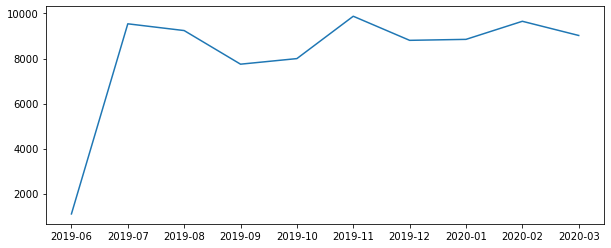

In [16]:
# monthly acquisition (subscribers only)
month_sub_acq = sub_acq[sub_acq['conversion'] == True].groupby('month').subid.agg('count')

plt.figure(figsize = (10,4))
plt.plot(month_sub_acq.index.astype('str'), month_sub_acq)
plt.show()

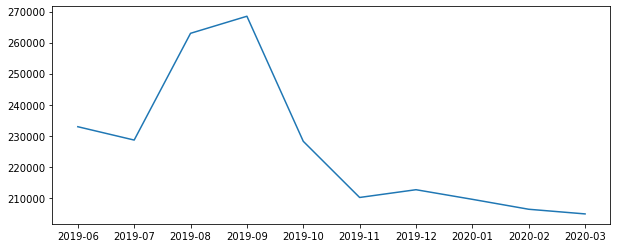

In [17]:
spend_total = df_spend.set_index('month').sum(axis = 1)

plt.figure(figsize = (10,4))
plt.plot(spend_total.index.astype('str'), spend_total)
plt.show()

# Extrapolation

In [18]:
extrapolate_factor = acq_join[acq_join['past_trial'] == True].groupby('month').sub_flg.agg(['sum', 'count']).reset_index()
extrapolate_factor['extrapolate'] = extrapolate_factor['count'] / extrapolate_factor['sum']
extrapolate_factor = extrapolate_factor[['month','extrapolate']]

extrapolate_factor

,month,extrapolate
0,2019-06,8.754322
1,2019-07,9.807588
2,2019-08,5.304371
3,2019-09,6.352304
4,2019-10,6.125172
5,2019-11,8.032294
6,2019-12,6.201181
7,2020-01,5.078861
8,2020-02,7.372695
9,2020-03,8.126219


In [19]:
# For each month and each channel, calculate how many customers signed up for trial
channel_sub = acq_join[(acq_join['sub_flg'] == True) & (acq_join['past_trial'] == True)].groupby(['month','attribution_technical']).subid.agg(['count']).reset_index()
channel_sub = channel_sub.merge(extrapolate_factor, on='month')
channel_sub['total_acq'] = channel_sub['count'] * channel_sub['extrapolate']

# Ad spend
channel_sub = channel_sub.merge(df_spend.melt('month', value_name = 'spend', var_name ='attribution_technical'), 
                                on = ['month', 'attribution_technical'])
channel_sub['spend'] = channel_sub['spend'].astype(int)

# Calculate CAC
channel_sub['cac'] = channel_sub['spend'] / channel_sub['total_acq']
channel_sub.round(2).head()

,month,attribution_technical,count,extrapolate,total_acq,spend,cac
0,2019-06,affiliate,39,8.75,341.42,11900,34.85
1,2019-06,brand sem intent google,91,8.75,796.64,21400,26.86
2,2019-06,email,135,8.75,1181.83,75000,63.46
3,2019-06,email_blast,61,8.75,534.01,10500,19.66
4,2019-06,facebook,491,8.75,4298.37,84800,19.73


# Average CAC

In [20]:
# Average CAC:
average_cac = channel_sub.groupby('attribution_technical')[['spend','total_acq']].agg('sum')
average_cac['cac'] = average_cac['spend'] / average_cac['total_acq']
average_cac.round(2)

,spend,total_acq,cac
attribution_technical,,,
affiliate,139500,20171.03,6.92
brand sem intent google,216100,51544.45,4.19
email,760600,70554.11,10.78
email_blast,226400,25006.33,9.05
facebook,552700,184118.43,3.00
pinterest,63300,12579.72,5.03
referral,73400,19127.20,3.84
search,232500,53931.43,4.31


In [21]:
# Total Average cac
totalavgcac = sum(average_cac['spend']) / sum(average_cac['total_acq'])
totalavgcac

5.181534253083555

/var/folders/9k/8mlr2d3j6kb410gw97hlqng40000gn/T/ipykernel_24333/4235772412.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.0f}'.format(x) for x in vals])


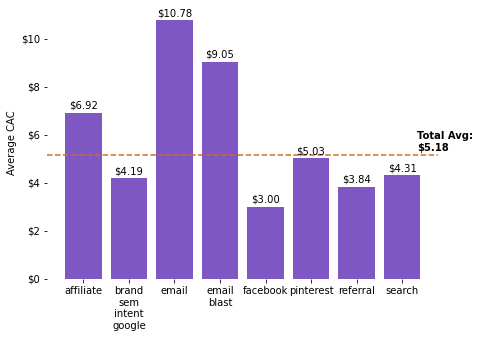

In [22]:
# create bar plot to visualize average cac

N = len(average_cac)

fig, ax = plt.subplots(figsize=(7, 5))
plt.box(False)

ind = np.arange(N)    # the x locations for the groups
width = 0.80        # the width of the bars

p1 = ax.bar(average_cac.index, average_cac['cac'], 
            width, bottom=0, color = '#7e57c2')

ax.axhline(totalavgcac, color='#c77025', linestyle = "dashed")

#ax.set_title(title)
ax.set(xlabel='', ylabel= 'Average CAC')
ax.set_xticks(ind)
ax.set_xticklabels(average_cac.index.str.replace('_', '\n').str.replace(' ', '\n'))

vals = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
ax.autoscale_view()

# cluster label
def autolabel(rects):
  for rect in rects:
      height = rect.get_height()
      ax.annotate('${:,.2f}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 2),  # points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

#average label
ax.annotate('Total Avg: \n${:,.2f}'.format(totalavgcac), xy = (ind[-1], totalavgcac),
                  xytext=(15, 2),  # points vertical offset
                  textcoords="offset points",
                  ha='left', va='bottom', fontweight = 'bold')

autolabel(p1)

plt.savefig('data.png')  
plt.show() 
plt.close()

In [23]:
print('Acquisitons from subscriber: %.2f' % len(sub_acq[sub_acq['conversion'] == True]))
print('Total (estimated) acquisitions: %.2f' % average_cac['total_acq'].sum())
print('%% (estimated): %.2f' % (len(sub_acq[sub_acq['conversion'] == True]) / average_cac['total_acq'].sum()))

print('Trial signups subs/total: %.2f' % (len(sub_acq) / len(acq_join)))

# My total estimated acquisitions is too low

Acquisitons from subscriber: 81844.00
Total (estimated) acquisitions: 437032.72
% (estimated): 0.19
Trial signups subs/total: 0.16


# Marginal CAC

In [24]:
marginal_cac = channel_sub[['month','attribution_technical','spend','total_acq']]

#remove June because of bias
marginal_cac = marginal_cac[marginal_cac['month'] != '2019-06']

# if 2 months have same spend, then take average
#marginal_cac = marginal_cac.groupby(['attribution_technical','spend']).total_acq.mean().reset_index()

marginal_cac = marginal_cac.sort_values(['attribution_technical', 'month'])

marginal_cac['month_cac'] = marginal_cac['spend'] / marginal_cac['total_acq']
marginal_cac['marginal_acq'] = marginal_cac['total_acq'] - marginal_cac.groupby('attribution_technical')['total_acq'].shift(1, fill_value = 0)
marginal_cac['marginal_spend'] = marginal_cac['spend'] - marginal_cac.groupby('attribution_technical')['spend'].shift(1, fill_value = 0)
marginal_cac['marginal_cac'] = marginal_cac['marginal_spend'] / marginal_cac['marginal_acq']

marginal_cac[marginal_cac['attribution_technical'] == 'brand sem intent google'].round(2)

,month,attribution_technical,spend,total_acq,month_cac,marginal_acq,marginal_spend,marginal_cac
9,2019-07,brand sem intent google,21300,7640.11,2.79,7640.11,21300,2.79
17,2019-08,brand sem intent google,21300,4333.67,4.92,-3306.44,0,-0.00
25,2019-09,brand sem intent google,21300,4313.21,4.94,-20.46,0,-0.00
33,2019-10,brand sem intent google,21400,4318.25,4.96,5.03,100,19.87
41,2019-11,brand sem intent google,21600,6980.06,3.09,2661.82,200,0.08
49,2019-12,brand sem intent google,22200,5847.71,3.80,-1132.35,600,-0.53
57,2020-01,brand sem intent google,22700,5276.94,4.30,-570.78,500,-0.88
65,2020-02,brand sem intent google,21700,6650.17,3.26,1373.23,-1000,-0.73
73,2020-03,brand sem intent google,21200,5387.68,3.93,-1262.49,-500,0.40


In [25]:
marginal_cac.to_csv('marginal.csv')

array([[<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>],
       [<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>],
       [<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>],
       [<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>]],
      dtype=object)

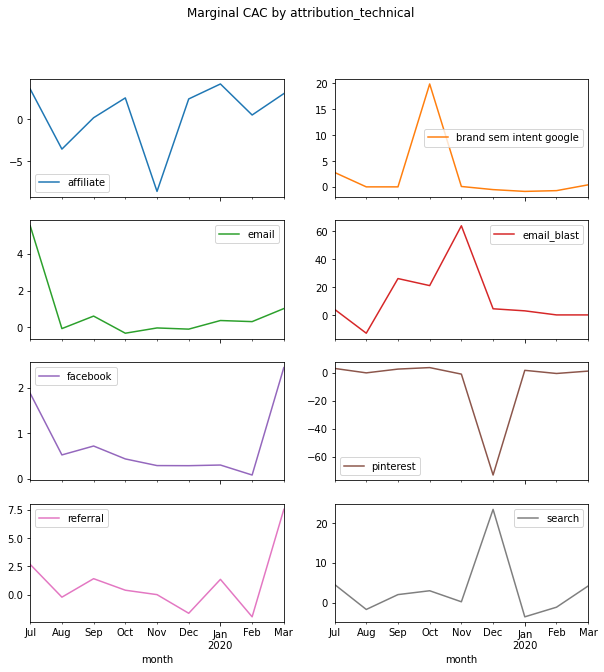

In [26]:
pd.pivot_table(marginal_cac.reset_index(),
               index='month', columns='attribution_technical', values='marginal_cac'
              ).plot(subplots=True,layout=(4,2),figsize=(10,10),title="Marginal CAC by attribution_technical")

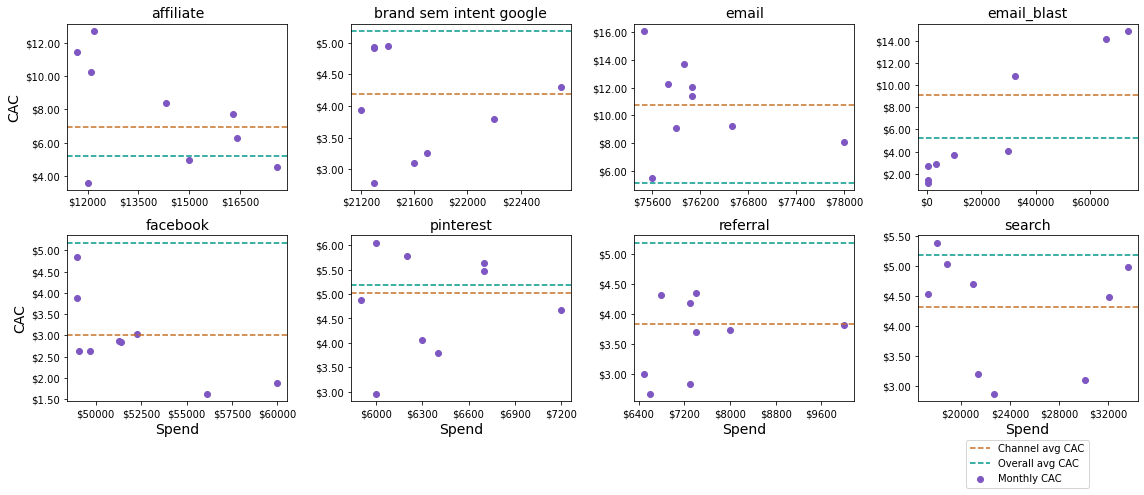

In [27]:
# plot monthly cac per channel

import matplotlib.ticker as ticker

formatter_y = ticker.FormatStrFormatter('$%1.2f')
formatter_x = ticker.FormatStrFormatter('$%1.0f')
    
fig = plt.figure(figsize=(16,7))

c = 0

for channel in marginal_cac['attribution_technical'].drop_duplicates():
    
    df = marginal_cac[marginal_cac['attribution_technical'] == channel]
    ax = fig.add_subplot(2,4, c+1)
    
    ax.axhline(average_cac.loc[average_cac.index == channel, 'cac'][0], 
               linestyle = "dashed", color = '#c77025', label = 'Channel avg CAC')
    ax.axhline(totalavgcac, linestyle = "dashed", color = '#009688', label = 'Overall avg CAC')
    p1 = ax.scatter(df['spend'], df['spend'] / df['total_acq'], color = '#7e57c2', label = 'Monthly CAC')
    ax.set_title(channel,size = 14)
    
    ax.yaxis.set_major_formatter(formatter_y)
    ax.xaxis.set_major_formatter(formatter_x)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    # put ylabel on graphs on left
    if (c % 4) == 0:
        ax.set_ylabel('CAC', size = 14)
    
    # put xlabel on last 3 graphs
    if c > 8-5:
        ax.set_xlabel('Spend', size = 14)    
    
    c += 1

#ax = fig.add_subplot(3,3, c+1)    
ax.legend(loc=9, bbox_to_anchor=(0.5,-0.2))   

plt.tight_layout()
plt.savefig('data1.png')  
plt.show()

## Recommendations:
* Affiliate - Better have high investment, 17600 is good
* Brand SEM intent google - low spend around 21300 is good, dimminishing returns
* Email - always performs lower than average. Recommend pulling investment from it.
* Email blast - performs well at low spend, better less than 29800
* Facebook - performing well at high spend, even at the current highest spend of 60000. Can try spending more.
* Pinterest - performs well at low amount of spending, around 6300
* Referral - medium amount of investment
## Conclusion:
* Low investment in Facebook at the moment. Too much investment in email. Current strategy has too much money in email, but more should be invested into Facebook and affiliate.